## Text classification on LeMonde2003 Dataset Ali Nahle

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/X9BWJTP2PoSRQBm/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/X9BWJTP2PoSRQBm/download/LeMonde2003_9classes.csv.gz
```

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `data/LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt`.



In [1]:
import pandas as pd

# load dataframe from CSV file
df = pd.read_csv('LeMonde2003_9classes.csv')
df

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT
...,...,...
30160,reçu à la mairie de biarritz à l'occasion d'un...,FRA
30161,la française malia metella a remporté le titre...,SPO
30162,1 pourquoi avoir choisi les années 1950 pour k...,ART
30163,la croix a licencié un journaliste alain herto...,ENT


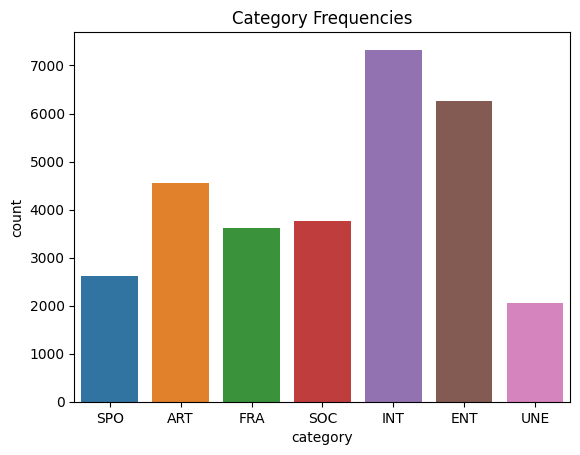

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
sns.countplot(x='category', data=df)

# Add a title
plt.title('Category Frequencies')

# Show the plot
plt.show()

In [3]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
samples = df.sample(n=5)

#print the examples of texts
samples['text']


22713                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

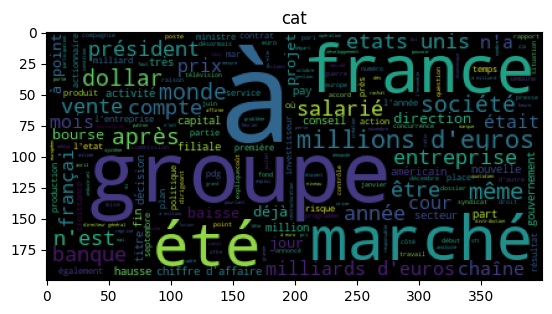

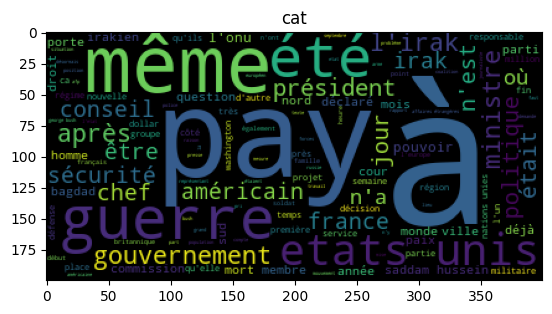

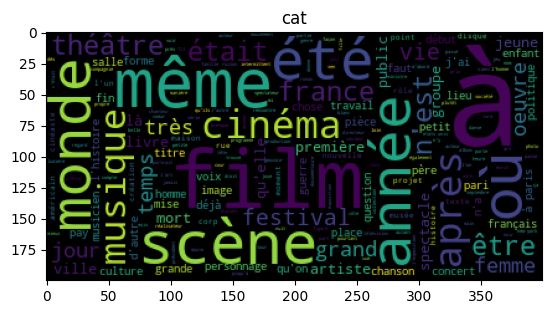

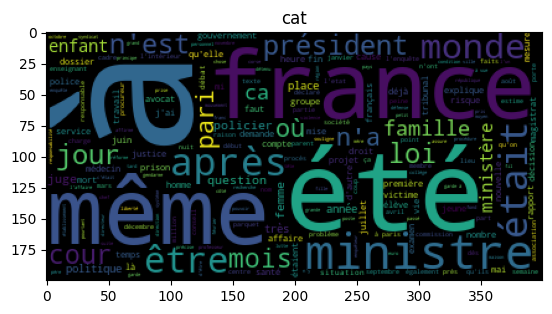

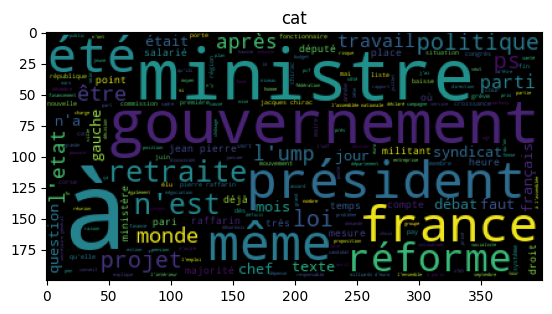

In [4]:
!pip install wordcloud
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt
STOPWORDS
# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    category=df[df.category==cat]
    txt=" ".join(text for text in category.text)
    wc=WordCloud(stopwords=STOPWORDS).generate(txt)
    fig,ax=plt.subplots()
    ax.set_title("cat")
    ax.imshow(wc)

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [5]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size

X = df['text']

# remove the 'text' column from the dataframe and store the remaining in 'y'
y = df.drop(columns=['text'])
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Size of X_train: ", X_train.shape[0])
print("Size of X_dev: ", X_dev.shape[0])
print("Size of X_test: ", X_test.shape[0])

Size of X_train:  24132
Size of X_dev:  3016
Size of X_test:  3017


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the CountVectorizer on the train set
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform the dev and test sets using the already fitted CountVectorizer
X_dev_vectors = vectorizer.transform(X_dev)
X_test_vectors = vectorizer.transform(X_test)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# train a Naive Bayes classifier
# create the MultinomialNB
clf = MultinomialNB()

# Train the classifier on the train set
clf.fit(X_train_vectors, y_train)

# Evaluate 
y_dev_pred = clf.predict(X_dev_vectors)
dev_acc = accuracy_score(y_dev, y_dev_pred)
print("Accuracy on train set: ", clf.score(X_train_vectors,y_train))
print("Accuracy on dev set: ", clf.score(X_dev_vectors,y_dev))
print("Accuracy on test set: ", clf.score(X_test_vectors,y_test))

Accuracy on train set:  0.7285347256754516
Accuracy on dev set:  0.7141909814323607
Accuracy on test set:  0.7305270135896585


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the TfidfTransformer on the train set
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vectors)

# Transform the dev and test sets using the already fitted TfidfTransformer
X_dev_tfidf = tfidf_transformer.transform(X_dev_vectors)
X_test_tfidf = tfidf_transformer.transform(X_test_vectors)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

y_dev_pred = clf.predict(X_dev_tfidf)
dev_acc = accuracy_score(y_dev, y_dev_pred)
print("Accuracy on dev set: ", clf.score(X_dev_tfidf,y_dev))
print("Accuracy on test set: ", clf.score(X_test_tfidf,y_test))

Accuracy on dev set:  0.7314323607427056
Accuracy on test set:  0.7457739476300961


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         ART       0.75      0.86      0.80       466
         ENT       0.75      0.86      0.80       598
         FRA       0.66      0.65      0.66       357
         INT       0.75      0.89      0.81       750
         SOC       0.68      0.61      0.64       364
         SPO       0.95      0.75      0.84       278
         UNE       0.00      0.00      0.00       204

    accuracy                           0.75      3017
   macro avg       0.65      0.66      0.65      3017
weighted avg       0.70      0.75      0.72      3017

[[402  24  10  19   9   1   1]
 [ 14 512  13  47  10   2   0]
 [ 13  33 233  30  47   1   0]
 [ 13  33  15 671  18   0   0]
 [ 34  27  47  32 223   1   0]
 [ 12  27   3  19   8 209   0]
 [ 47  23  32  81  14   7   0]]


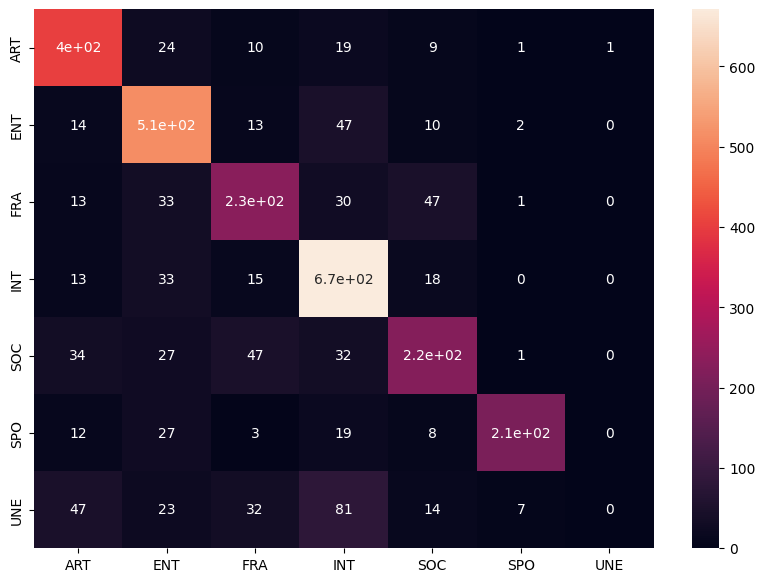

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import numpy as np
import seaborn as sn
target_labels = np.unique(y_train)
y_test_pred = clf.predict(X_test_tfidf)

# Generate a classification report
print(classification_report(y_test, y_test_pred, target_names=target_labels ))

cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm, index = target_labels,
                  columns = target_labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
print(cm)

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `ÙNE` from the original dataset using pandas [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

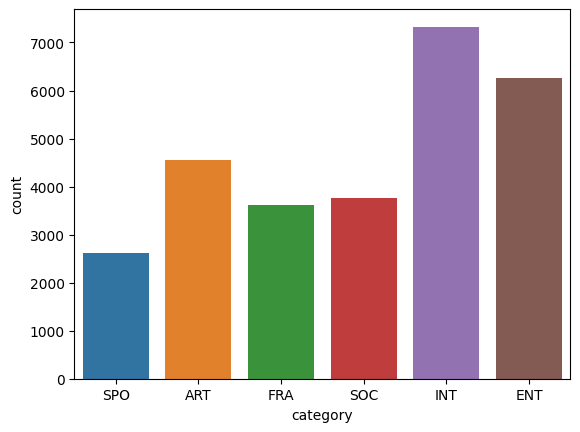

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.7994041266453219
Dev Accuracy: 0.7890430451796514
Test Accuracy: 0.7933119886161508


<AxesSubplot: >

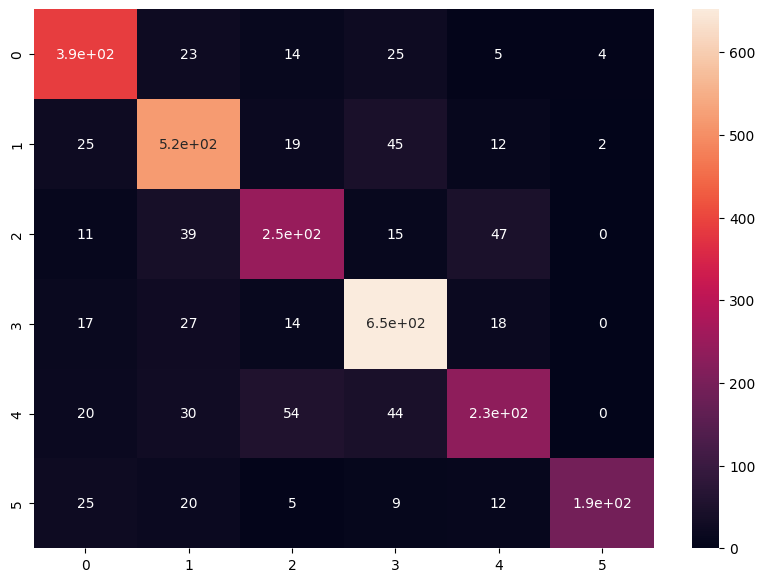

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Filter out the UNE class
df = df.replace("UNE", np.nan)
df = df.dropna()
# Plot the statistics of classes
sns.countplot(x="category", data=df)
plt.show()
X = df['text']
y = df.drop(columns=['text'])
# Make the splits and print the sizes for checking
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)


# Train MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)
# Print accuracy
train_accuracy = nb.score(X_train_vectorized, y_train)
print("Train Accuracy:", train_accuracy)

X_dev_vectorized = vectorizer.transform(X_dev)
dev_accuracy = nb.score(X_dev_vectorized, y_dev)
print("Dev Accuracy:", dev_accuracy)

X_test_vectorized = vectorizer.transform(X_test)
test_accuracy = nb.score(X_test_vectorized, y_test)
print("Test Accuracy:", test_accuracy)

# Print confusion matric
y_pred_test = nb.predict(X_test_vectorized)
test_confusion_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
sn.heatmap(test_confusion_matrix, annot=True)


## Hyperparameter optimization

The classification process has many parameters : alpha for the classifier, max_features, max_df, min_df, using idf or not, ngram orders for the Count of TfIDF transformer. These parameters can be optimized by a grid search using GridSearchCV.

**Question**:

> * Using the template code below, find the best values for the parameter max_features, max_df, min_df, use_idf, ngram_range, alpha
> * Refit the best model on all the train+dev data and print accuracy on test set

Note that for developping the code, the number of training samples is limited to 1000

```
df_filtered_train_dev.iloc[:1000].text
```

Once your code is correct, you can train on the full training set.


In [11]:
#### Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
df_filtered=df.copy()
# create train_dev and test set for using Cross-Validation
df_filtered_train_dev, df_filtered_test = train_test_split(df_filtered.dropna() ,test_size=0.10, random_state=42)
print ('train_dev size',df_filtered_train_dev.shape)
print ('test size',df_filtered_test.shape)
# keep only 1000 training data for debuging
X_train_dev, y_train_dev =df_filtered_train_dev.iloc[:1000].text, df_filtered_train_dev.iloc[:1000].category
X_test, y_test =df_filtered_test.text, df_filtered_test.category



pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])


parameters = {
    'tfidf__max_features': (500, 1000, 5000, 10000, None),
    'tfidf__max_df': [0.5, 0.7, 1.0],
    'tfidf__min_df': [2, 5, 10],
    'clf__alpha': [0.1, 0.5, 1.0],
    'clf__fit_prior': [True, False],
}
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=3)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train_dev, y_train_dev)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    df1 = pd.DataFrame(grid_search.cv_results_)
    print (df1[['rank_test_score','param_tfidf__max_features','mean_test_score']].sort_values('rank_test_score'))
    
    # use refit and print accuracy on test set
    # YOUR CODE HERE

train_dev size (25299, 2)
test size (2811, 2)
Performing grid search...
pipeline: ['tfidf', 'clf']
parameters:
{'clf__alpha': [0.1, 0.5, 1.0],
 'clf__fit_prior': [True, False],
 'tfidf__max_df': [0.5, 0.7, 1.0],
 'tfidf__max_features': (500, 1000, 5000, 10000, None),
 'tfidf__min_df': [2, 5, 10]}
Fitting 3 folds for each of 270 candidates, totalling 810 fits
done in 181.903s

Best score: 0.814
Best parameters set:
	clf__alpha: 0.1
	clf__fit_prior: False
	tfidf__max_df: 0.7
	tfidf__max_features: None
	tfidf__min_df: 2
     rank_test_score param_tfidf__max_features  mean_test_score
72                 1                      None         0.814009
51                 2                      5000         0.813008
69                 3                     10000         0.812001
54                 4                     10000         0.811998
57                 5                      None         0.811012
..               ...                       ...              ...
223              265         

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.9192013518320882
Dev Accuracy: 0.8783351120597652
Test Accuracy: 0.8822483102098897


<AxesSubplot: >

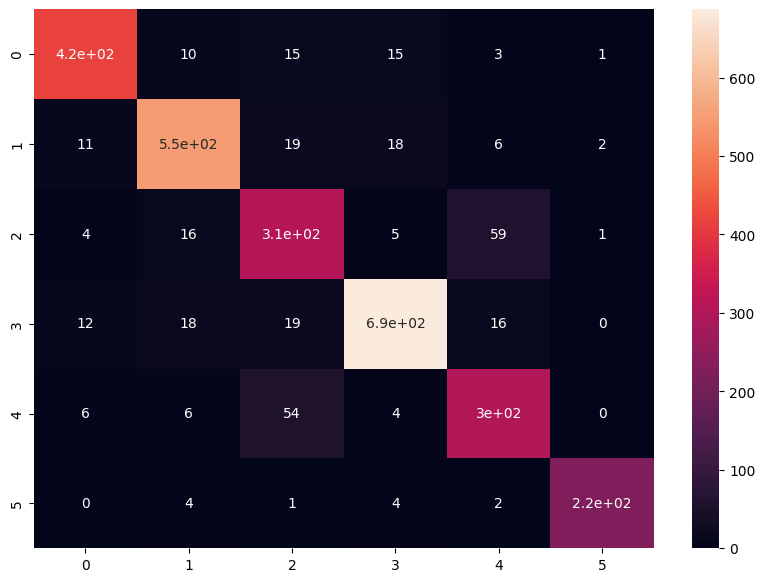

In [12]:
vectorizer = TfidfVectorizer(max_features=None,max_df=0.7,min_df=2)
X_train_vectorized = vectorizer.fit_transform(X_train)


# Train MultinomialNB
nb = MultinomialNB(alpha=0.1,fit_prior=False)
nb.fit(X_train_vectorized, y_train)
# Print accuracy
train_accuracy = nb.score(X_train_vectorized, y_train)
print("Train Accuracy:", train_accuracy)

X_dev_vectorized = vectorizer.transform(X_dev)
dev_accuracy = nb.score(X_dev_vectorized, y_dev)
print("Dev Accuracy:", dev_accuracy)

X_test_vectorized = vectorizer.transform(X_test)
test_accuracy = nb.score(X_test_vectorized, y_test)
print("Test Accuracy:", test_accuracy)

# Print confusion matric
y_pred_test = nb.predict(X_test_vectorized)
test_confusion_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
sn.heatmap(test_confusion_matrix, annot=True)

## Classification with Neural networks

Neural networks can be trained to learn both the vector representation of the words (instead of tf-idf) and how to classify the documents. The code below allows you to train a neural text classifier using word embeddings using Keras. Most of the code is written, you only have to define the architecture of the network with the correct parameters before training it : 

**Question**:

> * Define a neural network in the function `get_model()` with the following parameters : 
>  * use only the 10 000 most frequent words in the documents
>  * use 1024 as the maximal number of words in the articles
>  * use an embedding size of 300:  [embedding layer](https://keras.io/layers/embeddings/)
>  * use a dropout of 0.5:  [dropout layer](https://keras.io/layers/core/#dropout)
>  * use 32 convolutional filters of size 2 x EMBED_SIZE: [1D convolutional layer](https://keras.io/layers/convolutional/#conv1d)
>  * use a max pooling of size 2 : [1D Max Pooling](https://keras.io/layers/pooling/#maxpooling1d)
> * Train the model and compare its accuracy to the Naive Bayes models.



In [13]:
import ast
import os
from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils, pad_sequences
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence


In [14]:
# Model parameters
MAX_FEATURES = 10000
MAX_TEXT_LENGTH = 1023
EMBED_SIZE  = 300
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [16]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)



def get_model():

    inp = Input(shape=(MAX_TEXT_LENGTH))
    model = Embedding(MAX_FEATURES,EMBED_SIZE)(inp)
    model = Dropout(0.5)(model)
    model = Conv1D(filters=32, kernel_size=4, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=4)(model)
    model = Flatten()(model)
    model = Dense(6, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def train_fit_predict(model, x_train, x_test, y, history):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)


# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Define training procedure
history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


print("Test Accuracy:", accuracy_score(y_test, y_predicted))

p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted, 
                                              average='micro',
                                              labels=[x for x in np.unique(y_train) ])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_predicted, labels=[x for x in np.unique(y_train)]))

[0 1 2 3 4 5]
22488 2811
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1023)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1023, 300)         3000000   
                                                                 
 dropout_1 (Dropout)         (None, 1023, 300)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1023, 32)          38432     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 255, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8160)              0         
                                  